In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.metrics import mean_squared_error, f1_score, mean_absolute_error, accuracy_score, plot_confusion_matrix
from sklearn import svm
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier


import warnings
warnings.filterwarnings('ignore')

In [4]:
covid_census_percentage = pd.read_csv('../data/cleaned_percent_five_states.csv')

In [5]:
covid_census_percentage.head()

,county_state,total_cases,total_fatalities,death_rate,total_tests,sex_age_median_age_in_years,health_ins_noninst_pop_private,health_ins_noninst_pop_public,inc_med_hhld_inc_dol,inc_mean_hhld_inc_dol,...,percent_inc_hhlds_less_than_10_000,percent_inc_hhlds_10_000_to_14_999,percent_inc_hhlds_15_000_to_24_999,percent_inc_hhlds_25_000_to_34_999,percent_inc_hhlds_35_000_to_49_999,percent_inc_hhlds_50_000_to_74_999,percent_inc_hhlds_75_000_to_99_999,percent_inc_hhlds_100_000_to_149_999,percent_inc_hhlds_150_000_to_199_999,percent_inc_hhlds_200_000_or_more
0,"Santa Clara County, California",23978.0,388.0,0.016181,839764,37.0,1466921,513162,116178,154183,...,0.032184,0.027568,0.045773,0.046066,0.069604,0.112076,0.102890,0.180432,0.131112,0.252295
1,"San Mateo County, California",10942.0,159.0,0.014531,285657,39.6,597415,211256,113776,162639,...,0.029114,0.023087,0.044536,0.047429,0.069649,0.115617,0.110609,0.180571,0.123301,0.256088
2,"Santa Barbara County, California",9781.0,120.0,0.012269,158693,33.7,278874,161408,71657,101100,...,0.047350,0.037879,0.074613,0.079538,0.116982,0.164022,0.128020,0.164871,0.082373,0.104351
3,"Tuolumne County, California",269.0,4.0,0.014870,20986,48.4,33585,24538,56493,80361,...,0.057832,0.064654,0.091943,0.104606,0.126366,0.180363,0.138850,0.135462,0.039506,0.060418
4,"Sierra County, California",6.0,0.0,0.000000,641,55.5,1789,1403,48125,67464,...,0.036261,0.102337,0.116841,0.095085,0.157937,0.112006,0.108783,0.211926,0.038678,0.020145


In [6]:
list(covid_census_percentage.columns)

['county_state',
 'total_cases',
 'total_fatalities',
 'death_rate',
 'total_tests',
 'sex_age_median_age_in_years',
 'health_ins_noninst_pop_private',
 'health_ins_noninst_pop_public',
 'inc_med_hhld_inc_dol',
 'inc_mean_hhld_inc_dol',
 'inc_per_capita_inc_dol',
 'inc_med_earn_workers_dol',
 'inc_med_earn_male_full_yr_workers_dol',
 'inc_med_earn_female_full_yr_workers_dol',
 'deaths_per_100_cases',
 'cases_per_100_people',
 'tests_per_100_people',
 'pop_density',
 'obes_percent',
 'percent_race_pop_hispanic_or_latino_of_any_race',
 'percent_race_pop_white_alone',
 'percent_race_pop_black_or_african_american_alone',
 'percent_race_pop_american_indian_and_alaska_native_alone',
 'percent_race_pop_asian_alone',
 'percent_race_pop_native_hawaiian_and_other_pacific_islander_alone',
 'percent_race_pop_some_other_race_alone',
 'percent_race_pop_two_or_more_races',
 'percent_sex_age_pop_male',
 'percent_sex_age_pop_female',
 'percent_sex_age_pop_under_5',
 'percent_sex_age_pop_5_to_9',
 'perc

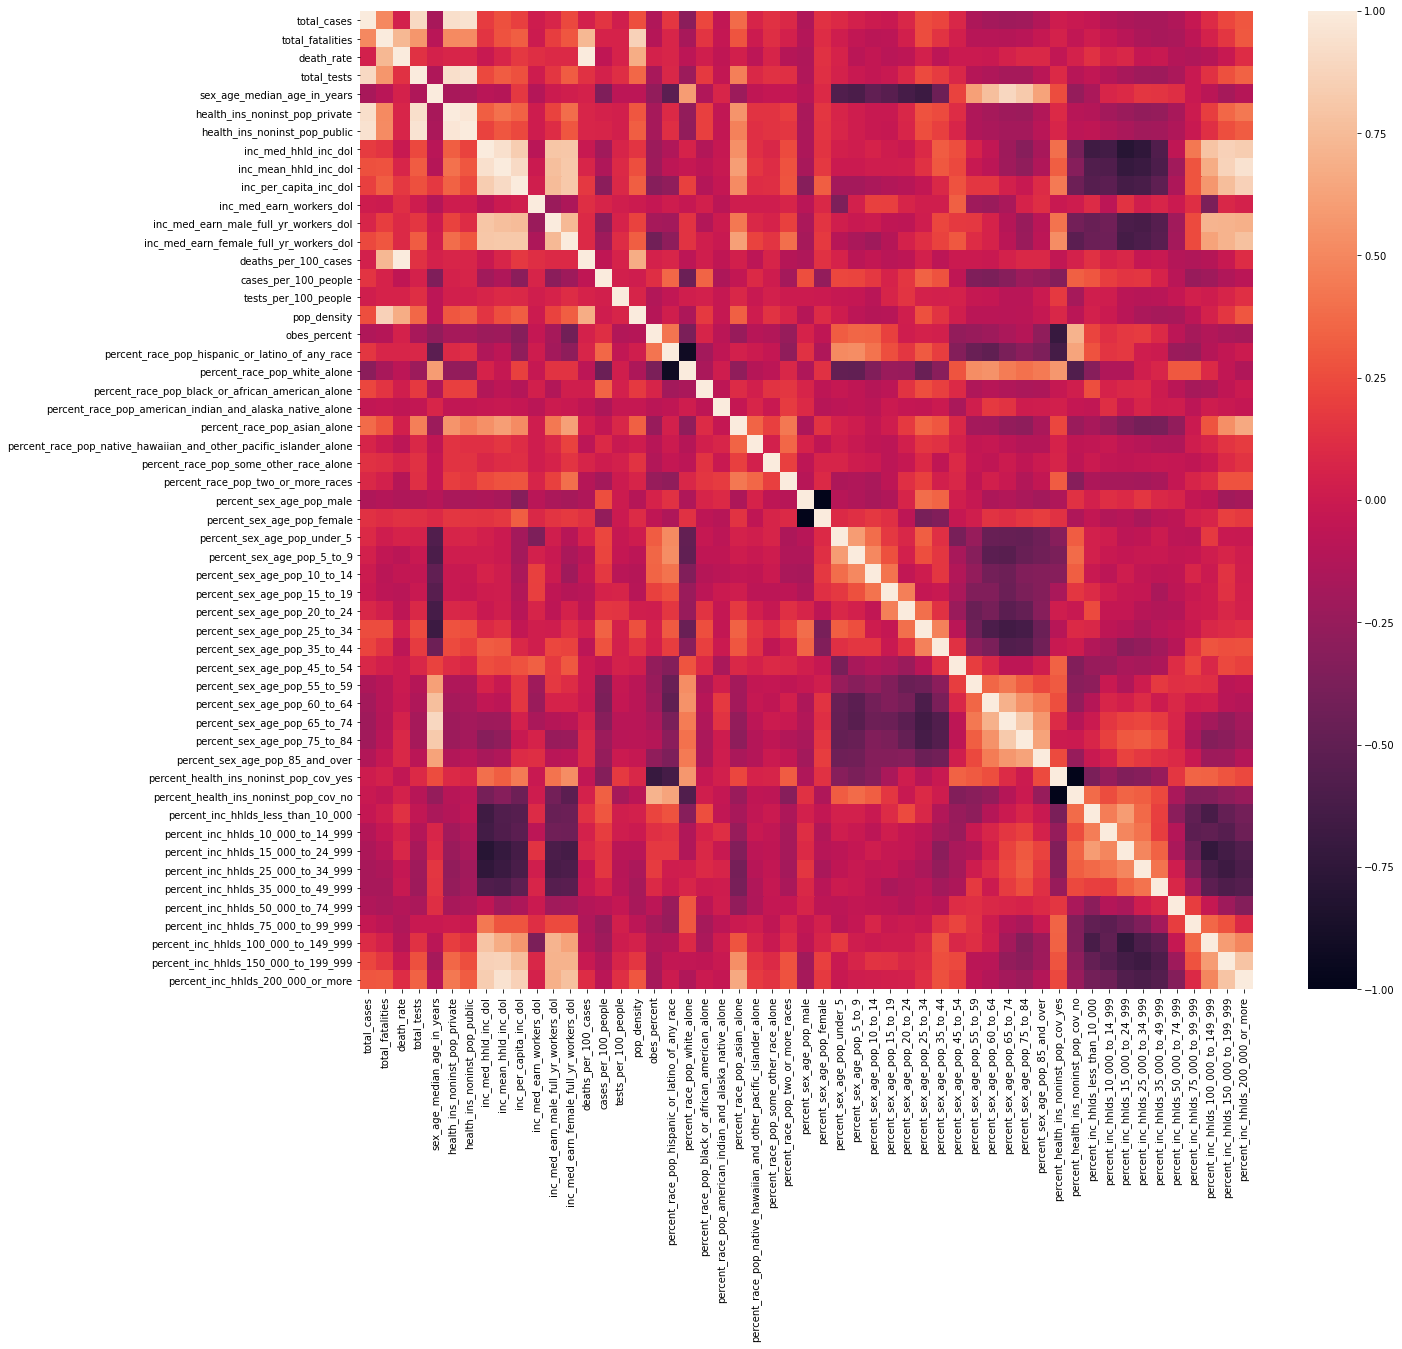

In [11]:
plt.figure(figsize=(20, 18))
sns.heatmap(covid_census_percentage.corr())

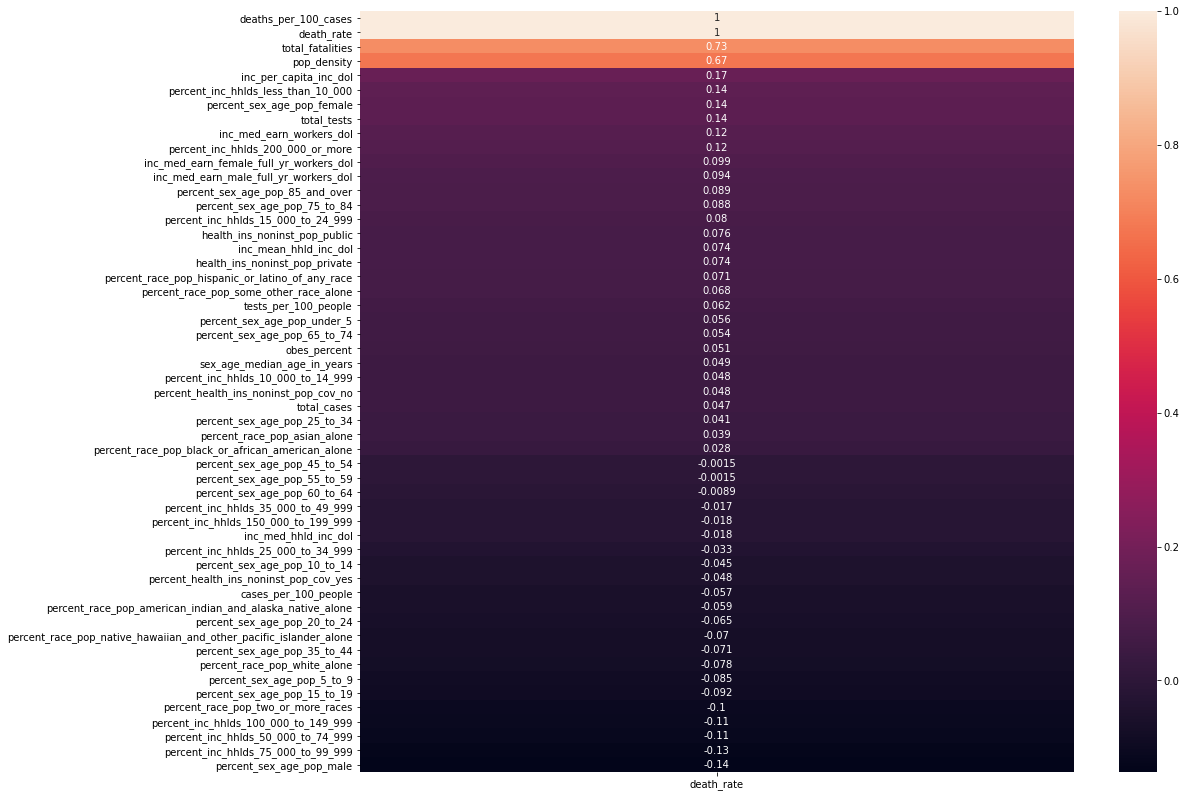

In [15]:
plt.figure(figsize=(16, 14))
sns.heatmap(covid_census_percentage.corr()[['death_rate']].sort_values(ascending=False, by='death_rate'), annot=True);

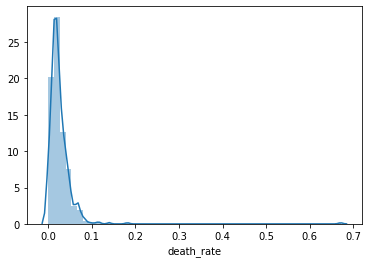

In [20]:
sns.distplot(covid_census_percentage['death_rate'])

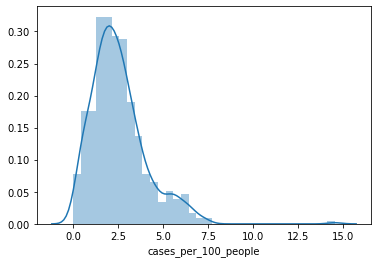

In [30]:
sns.distplot(covid_census_percentage['cases_per_100_people'])

In [48]:
covid_census_percentage.fillna(0, inplace=True)

In [49]:
covid_census_percentage.isna().sum()

county_state                                                         0
total_cases                                                          0
total_fatalities                                                     0
death_rate                                                           0
total_tests                                                          0
sex_age_median_age_in_years                                          0
health_ins_noninst_pop_private                                       0
health_ins_noninst_pop_public                                        0
inc_med_hhld_inc_dol                                                 0
inc_mean_hhld_inc_dol                                                0
inc_per_capita_inc_dol                                               0
inc_med_earn_workers_dol                                             0
inc_med_earn_male_full_yr_workers_dol                                0
inc_med_earn_female_full_yr_workers_dol                              0
deaths

In [67]:
covid_census_percentage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 54 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   county_state                                                       543 non-null    object 
 1   total_cases                                                        543 non-null    float64
 2   total_fatalities                                                   543 non-null    float64
 3   death_rate                                                         543 non-null    float64
 4   total_tests                                                        543 non-null    int64  
 5   sex_age_median_age_in_years                                        543 non-null    float64
 6   health_ins_noninst_pop_private                                     543 non-null    int64  
 7   health_ins_noninst_pop_pub

In [95]:
X = covid_census_percentage[['total_tests','sex_age_median_age_in_years','health_ins_noninst_pop_private','health_ins_noninst_pop_public',
                                          'inc_med_hhld_inc_dol','inc_mean_hhld_inc_dol','inc_per_capita_inc_dol','inc_med_earn_workers_dol',
                                          'inc_med_earn_male_full_yr_workers_dol','inc_med_earn_female_full_yr_workers_dol','pop_density','obes_percent',
                                          'percent_race_pop_hispanic_or_latino_of_any_race','percent_race_pop_white_alone',
                                          'percent_race_pop_black_or_african_american_alone','percent_race_pop_american_indian_and_alaska_native_alone',
                                          'percent_race_pop_asian_alone','percent_race_pop_native_hawaiian_and_other_pacific_islander_alone',
                                          'percent_race_pop_some_other_race_alone','percent_race_pop_two_or_more_races','percent_sex_age_pop_male',
                                          'percent_sex_age_pop_female','percent_sex_age_pop_under_5','percent_sex_age_pop_5_to_9','percent_sex_age_pop_10_to_14',
                                          'percent_sex_age_pop_15_to_19','percent_sex_age_pop_20_to_24','percent_sex_age_pop_25_to_34',
                                          'percent_sex_age_pop_35_to_44','percent_sex_age_pop_45_to_54','percent_sex_age_pop_55_to_59',
                                          'percent_sex_age_pop_60_to_64','percent_sex_age_pop_65_to_74','percent_sex_age_pop_75_to_84',
                                          'percent_sex_age_pop_85_and_over','percent_health_ins_noninst_pop_cov_yes','percent_health_ins_noninst_pop_cov_no',
                                          'percent_inc_hhlds_less_than_10_000','percent_inc_hhlds_10_000_to_14_999','percent_inc_hhlds_15_000_to_24_999',
                                          'percent_inc_hhlds_25_000_to_34_999','percent_inc_hhlds_35_000_to_49_999','percent_inc_hhlds_50_000_to_74_999',
                                          'percent_inc_hhlds_75_000_to_99_999','percent_inc_hhlds_100_000_to_149_999','percent_inc_hhlds_150_000_to_199_999',
                                          'percent_inc_hhlds_200_000_or_more']]

y = covid_census_percentage['cases_per_100_people']

In [96]:
y.isna().sum()

0

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

In [98]:
lr = LinearRegression()

In [99]:
lr.fit(X_train, y_train)

LinearRegression()

In [100]:
lr.score(X_test, y_test)

-10508688.235901756

In [101]:
ridge = Ridge()

In [102]:
ss = StandardScaler()

In [103]:
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [106]:
ridge.fit(X_train_ss, y_train)
ridge.score(X_test_ss, y_test)

-8984594.540159896

In [208]:
model_list = [
    LinearRegression(),
    Ridge(), 
    KNeighborsRegressor(), 
    DecisionTreeRegressor(), 
    BaggingRegressor(),
    RandomForestRegressor(), 
    AdaBoostRegressor(), 
    SVR()
]

In [209]:
for model in model_list: 
    
    '''looping through all models, fitting it, 
    and printing the score using train and test data'''
    
    model.fit(X_train_ss, y_train)
    print(f'train score for {model} is {model.score(X_train_ss, y_train)}')
    print(f'test score for {model} is {model.score(X_test_ss, y_test)}')
    print(f'cross-val-score for {model} is {cross_val_score(model, X_test_ss, y_test).mean()}')
    print('\n')

train score for LinearRegression() is 0.5454951455782928
test score for LinearRegression() is -9663661.771964423
cross-val-score for LinearRegression() is -58195182.270288095


train score for Ridge() is 0.5451833349102455
test score for Ridge() is -8984594.540159896
cross-val-score for Ridge() is -17110523.90292994


train score for KNeighborsRegressor() is 0.5968616819280683
test score for KNeighborsRegressor() is 0.45989301101694
cross-val-score for KNeighborsRegressor() is 0.2670737460692904


train score for DecisionTreeRegressor() is 1.0
test score for DecisionTreeRegressor() is -0.7803624647874738
cross-val-score for DecisionTreeRegressor() is -0.14688905892962953


train score for BaggingRegressor() is 0.9028356340520837
test score for BaggingRegressor() is 0.3818599142550305
cross-val-score for BaggingRegressor() is 0.27325299934214575


train score for RandomForestRegressor() is 0.917907592923165
test score for RandomForestRegressor() is 0.48723468603780495
cross-val-score fo

In [175]:
pipe = make_pipeline(StandardScaler(), SVR())
params = {
    'svr__degree':np.arange(0.01, 0.1, 0.01),
#     'svr__C':[1.5, 10],
#     'svr__gamma': [1e-7, 1e-4],
#     'svr__epsilon':[0.1,0.2,0.5,0.3]
}

In [176]:
grid = GridSearchCV(pipe, params)

In [177]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__degree': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])})

In [178]:
grid.best_params_

{'svr__degree': 0.01}

In [179]:
print(f'train score for {grid} is {grid.score(X_train, y_train)}')
print(f'test score for {grid} is {grid.score(X_test, y_test)}')
print(f'cross-val-score for {grid} is {cross_val_score(grid, X_test, y_test).mean()}')
print('\n')

train score for GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__degree': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])}) is 0.6204751765486392
test score for GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__degree': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])}) is 0.5123837378126888
cross-val-score for GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__degree': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])}) is 0.3990264526096601




## Random Forest

In [203]:
pipe_forest = make_pipeline(StandardScaler(), RandomForestRegressor())
params_forest = {
    'randomforestregressor__max_depth': range(21, 55, 2),
#     'randomforestregressor__min_samples_split': [2, 3, 4, 5],
#     'randomforestregressor__min_samples_leaf': [1, 2, 3, 5]
}

In [204]:
grid_forest = GridSearchCV(pipe_forest, params_forest)

In [205]:
grid_forest.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__max_depth': range(21, 55, 2)})

In [206]:
grid_forest.best_params_

{'randomforestregressor__max_depth': 53}

In [207]:
print(f'train score for {grid_forest} is {grid_forest.score(X_train, y_train)}')
print(f'test score for {grid_forest} is {grid_forest.score(X_test, y_test)}')
print(f'cross-val-score for {grid_forest} is {cross_val_score(grid_forest, X_test, y_test).mean()}')
print('\n')

train score for GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__max_depth': range(21, 55, 2)}) is 0.9279883367284517
test score for GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__max_depth': range(21, 55, 2)}) is 0.48210478748344754
cross-val-score for GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__max_depth': range(21, 55, 2)}) is 0.3309401196935967




In [212]:
covid_census_percentage['covid_severity'] = 0
mask1 = covid_census_percentage['cases_per_100_people'] < 2
mask2 = (covid_census_percentage['cases_per_100_people'] >= 2) & (covid_census_percentage['cases_per_100_people'] < 3)
mask3 = covid_census_percentage['cases_per_100_people'] >= 3
covid_census_percentage['covid_severity'][mask1] = 1
covid_census_percentage['covid_severity'][mask2] = 2
covid_census_percentage['covid_severity'][mask3] = 3
covid_census_percentage['covid_severity'].value_counts()

1    228
3    158
2    157
Name: covid_severity, dtype: int64